In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 90s 1us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
x_train[0].shape

(32, 32, 3)

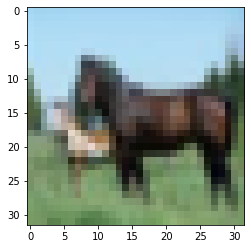

In [9]:
plt.imshow(x_train[12])

In [10]:
x_train[0].max()

255

In [11]:
x_train = x_train/255

In [12]:
x_test = x_test/255

In [13]:
x_test.shape

(10000, 32, 32, 3)

In [15]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
y_cat_train = to_categorical(y_train,10)

In [18]:
y_cat_test = to_categorical(y_test,10)

In [19]:
y_train[0]

array([6], dtype=uint8)

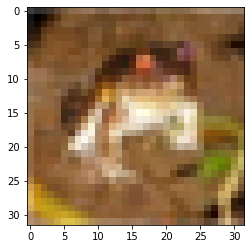

In [20]:
plt.imshow(x_train[0])

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [24]:
model = Sequential()

#CONVOLUTION LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu',))
#POOLING LAYER
model.add(MaxPool2D(pool_size=(2,2)))

#CONVOLUTION LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu',))
#POOLING LAYER
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [29]:
model.fit(x_train,y_cat_train,epochs=15,
         validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 53s 1ms/sample - loss: 1.4965 - accuracy: 0.4607 - val_loss: 1.2785 - val_accuracy: 0.5491
Epoch 2/15
50000/50000 [==============================] - 48s 954us/sample - loss: 1.1766 - accuracy: 0.5839 - val_loss: 1.0940 - val_accuracy: 0.6166
Epoch 3/15
50000/50000 [==============================] - 49s 971us/sample - loss: 1.0309 - accuracy: 0.6375 - val_loss: 1.0582 - val_accuracy: 0.6327
Epoch 4/15
50000/50000 [==============================] - 48s 960us/sample - loss: 0.9211 - accuracy: 0.6783 - val_loss: 1.0010 - val_accuracy: 0.6539
Epoch 5/15
50000/50000 [==============================] - 48s 967us/sample - loss: 0.8385 - accuracy: 0.7086 - val_loss: 0.9749 - val_accuracy: 0.6671
Epoch 6/15
50000/50000 [==============================] - 48s 959us/sample - loss: 0.7594 - accuracy: 0.7338 - val_loss: 0.9958 - val_accuracy: 0.6636
Epoch 7/15
50000/50000 [======================

In [30]:
metrics = pd.DataFrame(model.history.history)

In [31]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.496507,0.46070,1.278500,0.5491
1,1.176551,0.58394,1.094032,0.6166
2,1.030914,0.63752,1.058226,0.6327
3,0.921078,0.67826,1.000973,0.6539
4,0.838472,0.70856,0.974929,0.6671
5,0.759410,0.73378,0.995826,0.6636
6,0.690664,0.75732,0.981601,0.6700


In [32]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

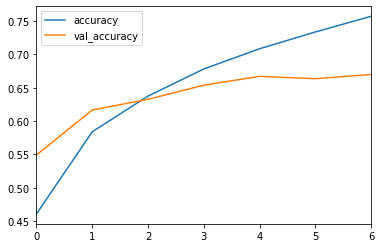

In [33]:
metrics[['accuracy','val_accuracy']].plot()

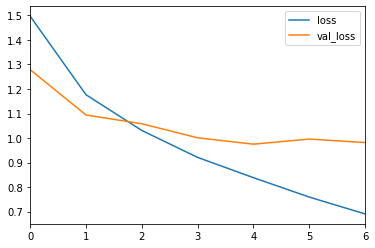

In [34]:
metrics[['loss','val_loss']].plot()

In [35]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.9816014045715332, 0.67]

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
predictions = model.predict_classes(x_test)

In [39]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.63      0.76      0.69      1000
           1       0.85      0.70      0.77      1000
           2       0.60      0.57      0.58      1000
           3       0.47      0.49      0.48      1000
           4       0.65      0.63      0.64      1000
           5       0.58      0.56      0.57      1000
           6       0.87      0.62      0.73      1000
           7       0.75      0.72      0.74      1000
           8       0.71      0.83      0.77      1000
           9       0.69      0.80      0.74      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



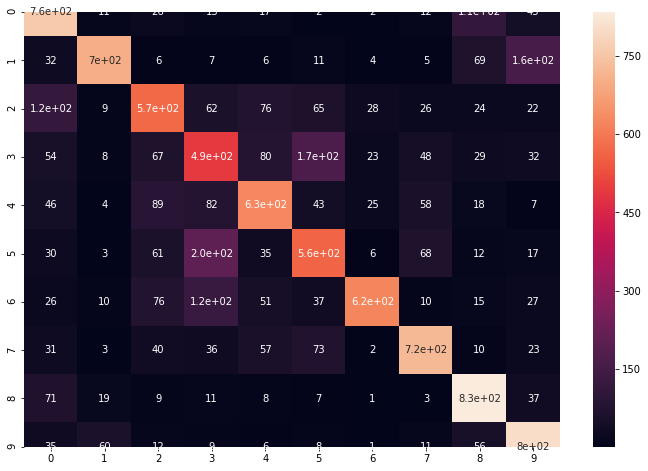

In [41]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [42]:
my_image = x_test[0]

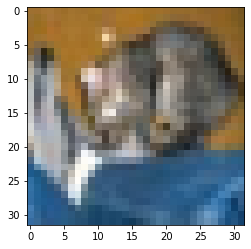

In [44]:
plt.imshow(my_image)

In [46]:
y_test[0]

array([3], dtype=uint8)

In [47]:
model.predict_classes(my_image.reshape(1,32,32,3))

array([3], dtype=int64)